Weighted Adjacency Matrix for Graph A:
[[0 3 0 0 1]
 [3 0 5 1 0]
 [0 5 0 3 0]
 [0 1 3 0 2]
 [1 0 0 2 0]]

Weighted Adjacency Matrix for Graph B:
[[0 1 1 0 0 0]
 [0 0 6 0 5 0]
 [0 0 0 3 0 0]
 [0 2 0 0 0 3]
 [0 0 0 1 0 5]
 [0 0 0 0 0 0]]


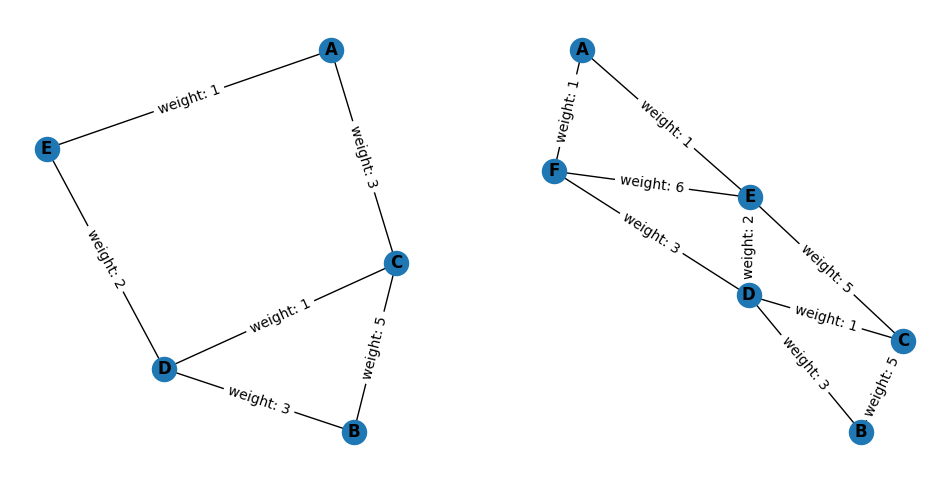

In [38]:
#Exercise02
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Graph A
edges_A = [('A', 'C', 3), ('C', 'B', 5), ('B', 'D', 3), ('C', 'D', 1), ('D', 'E', 2), ('E', 'A', 1)]
G_A = nx.Graph()
G_A.add_weighted_edges_from(edges_A)
adj_matrix_A = nx.adjacency_matrix(G_A).todense()

# Graph B
edges_B = [('A', 'E', 1), ('A', 'F', 1), ('F', 'D', 3), ('D', 'E', 2), ('E', 'C', 5), ('C', 'D', 1), ('C', 'B', 5), ('D', 'B', 3), ('E', 'F', 6) ]
G_B = nx.DiGraph()
G_B.add_weighted_edges_from(edges_B)
adj_matrix_B = nx.adjacency_matrix(G_B).todense()

# Print the weighted adjacency matrices
print("Weighted Adjacency Matrix for Graph A:")
print(adj_matrix_A)
print("\nWeighted Adjacency Matrix for Graph B:")
print(adj_matrix_B)

# Draw the graphs
# Draw the graphs
plt.figure(figsize=(12, 6))
plt.subplot(121)
pos = nx.spring_layout(G_A)
nx.draw(G_A, pos, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(G_A, pos, edge_labels={(u, v): f"weight: {d['weight']}" for u, v, d in G_A.edges(data=True)})

plt.subplot(122)
pos = nx.spring_layout(G_B)
nx.draw(G_B.to_undirected(), pos, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(G_B, pos, edge_labels={(u, v): f"weight: {d['weight']}" for u, v, d in G_B.edges(data=True)})

plt.show()

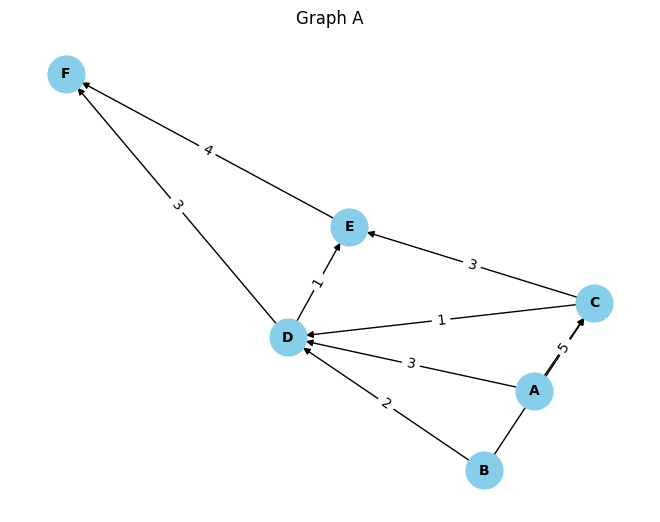

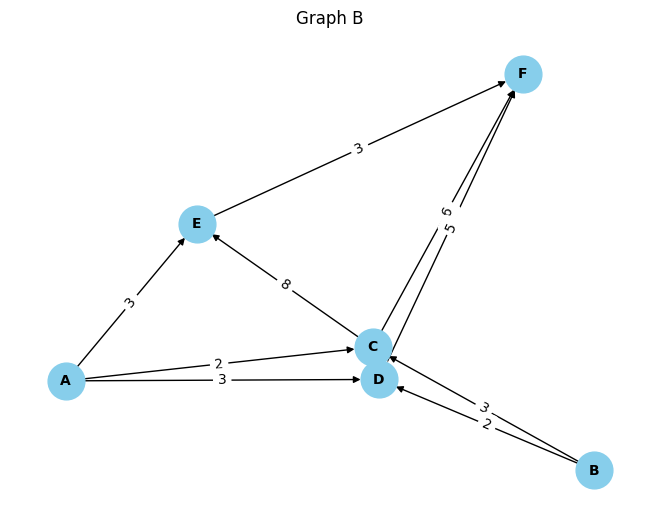

Weighted Adjacency Matrix for Graph A:
[[0 5 3 0 0 0]
 [0 0 1 0 3 0]
 [0 0 0 0 1 3]
 [0 3 2 0 0 0]
 [0 0 0 0 0 4]
 [0 0 0 0 0 0]]

Weighted Adjacency Matrix for Graph B:
[[0 2 3 3 0 0]
 [0 0 2 8 0 6]
 [0 0 0 0 0 5]
 [0 0 0 0 0 3]
 [0 3 2 0 0 0]
 [0 0 0 0 0 0]]


In [40]:
#Exercise03

import networkx as nx
import matplotlib.pyplot as plt

def generate_graph(edges):
    """
    Generate a directed graph from a list of edges with weights.
    """
    G = nx.DiGraph()
    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=edge[2])
    return G

def draw_graph(G, title):
    """
    Draw the graph with edge weights.
    """
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(title)
    plt.show()

def get_weighted_adjacency_matrix(G):
    """
    Get the weighted adjacency matrix of a graph.
    """
    return nx.adjacency_matrix(G, weight='weight').todense()

#a)
edges_a = [
    ('A', 'C', 5), ('A', 'D', 3), ('B', 'C', 3), ('B', 'D', 2), ('C', 'D', 1),
    ('C', 'E', 3), ('D', 'E', 1), ('D', 'F', 3), ('E', 'F', 4)
]

#b)
edges_b = [
    ('A', 'C', 2), ('A', 'D', 3), ('A', 'E', 3), ('B', 'C', 3), ('B', 'D', 2),
    ('C', 'D', 2), ('C', 'E', 8), ('C', 'F', 6), ('D', 'F', 5), ('E', 'F', 3)
]

G_a = generate_graph(edges_a)
draw_graph(G_a, "Graph A")
G_b = generate_graph(edges_b)
draw_graph(G_b, "Graph B")

print("Weighted Adjacency Matrix for Graph A:")
print(get_weighted_adjacency_matrix(G_a))
print("\nWeighted Adjacency Matrix for Graph B:")
print(get_weighted_adjacency_matrix(G_b))

In [44]:
#Exercise04

def toLoE(A):
    """
    Convert a weighted matrix A to its list of edges.
    Assumes A is in upper triangle form (excluding the diagonal).
    """
    n = len(A)
    edges = []
    for i in range(n):
        for j in range(i + 1, n):
            if A[i][j] != 0:
                edges.append((i, j, A[i][j]))
    return edges

# Example usage:
weighted_matrix = [
 [0, 5, 3, 0, 0, 0],
 [0, 0, 1, 0, 3, 0],
 [0, 0, 0, 0, 1, 3],
 [0, 3, 2, 0, 0, 0],
 [0, 0, 0, 0, 0, 4],
 [0, 0, 0, 0, 0, 0]]

edges = toLoE(weighted_matrix)
print("List of Edges:")
for edge in edges:
    print(edge)

List of Edges:
(0, 1, 5)
(0, 2, 3)
(1, 2, 1)
(1, 4, 3)
(2, 4, 1)
(2, 5, 3)
(4, 5, 4)


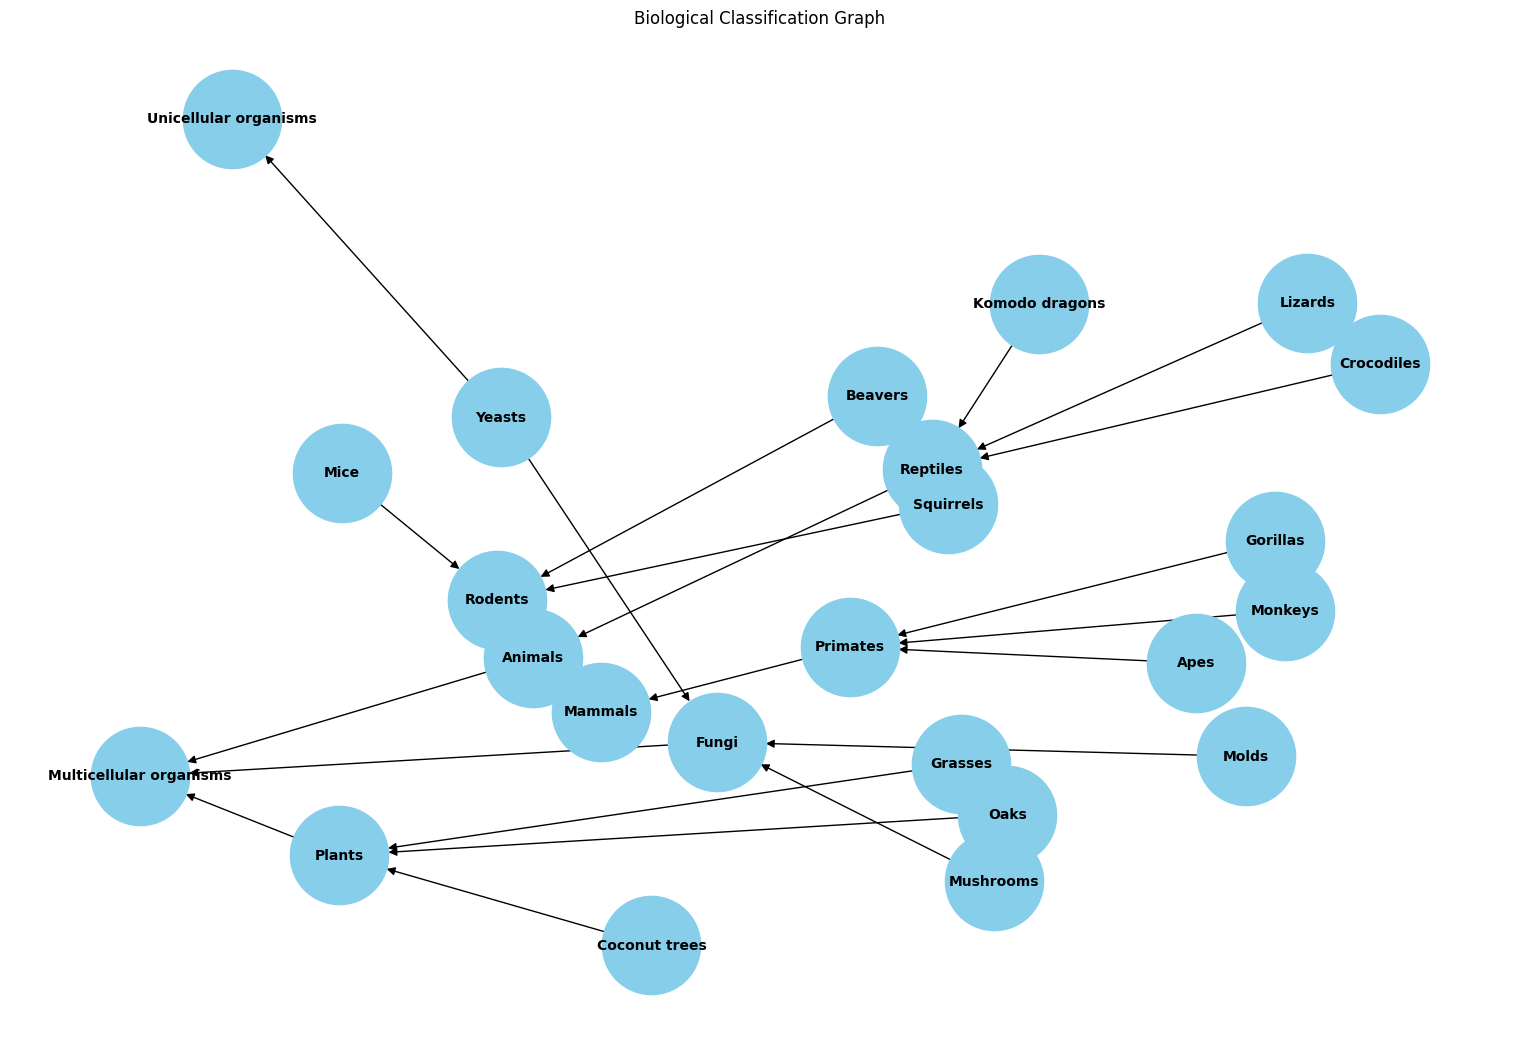

In [68]:
#Exercise05

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

categories = ['Primates', 'Rodents', 'Reptiles', 'Plants', 'Fungi', 'Mammals', 'Animals', 'Multicellular organisms', 'Unicellular organisms']
G.add_nodes_from(categories)

members = {
    'Primates': ['Monkeys', 'Apes', 'Gorillas'],
    'Rodents': ['Mice', 'Squirrels', 'Beavers'],
    'Reptiles': ['Crocodiles', 'Komodo dragons', 'Lizards'],
    'Plants': ['Coconut trees', 'Grasses', 'Oaks'],
    'Fungi': ['Mushrooms', 'Molds', 'Yeasts']
}

for category, member_list in members.items():
    for member in member_list:
        G.add_node(member)
        G.add_edge(member, category)

relationships = [
    ('Primates', 'Mammals'), ('Rodents', 'Mammals'),
    ('Mammals', 'Animals'), ('Rodents', 'Animals'), ('Reptiles', 'Animals'),
    ('Animals', 'Multicellular organisms'), ('Plants', 'Multicellular organisms'), ('Fungi', 'Multicellular organisms'),
    ('Yeasts', 'Unicellular organisms')
]

G.add_edges_from(relationships)

pos = nx.spring_layout(G)
plt.figure(figsize=(15, 10))
nx.draw(G, pos, with_labels=True, node_size=5000, node_color='skyblue', font_size=10, font_weight='bold', arrowstyle='-|>', arrowsize=12)
plt.title('Biological Classification Graph')
plt.show()